**HOMEWORK**

Deadiline senin 13 mei 2024, jam 15.00 Kirim Ke sursyasatriya@uksw.edu
1. Pakailah California Housing Datasets sebagai data
2. Pakailah elastic-ner denga alpha = 0.1, dan L1_ratio= 0.5, carilah regresi linearnya 
3. Carilah features yang dipakai di elastic net
4. Pakaula PCA (sklearn) untuk menggambar data Harga thd PCA1 dang PCA3 yang diperoleh. 

In [37]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [3]:
data = fetch_california_housing()

In [5]:
df = pd.DataFrame(data.data, columns =data.feature_names)
df['target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
X = df.drop('target', axis=1)
y = df['target']

In [19]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xc = scaler.fit_transform(X)


In [30]:
column_names = X.columns
Xc = pd.DataFrame(Xc, columns=column_names)
Xc

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [33]:
#elastic-net denga alpha = 0.1, dan L1_ratio= 0.5, carilah regresi linearnya 
alpha_elnet = 0.1
elnet = ElasticNet(alpha=alpha_elnet, l1_ratio=0.5)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(Xc, y, test_size=0.33, random_state = 42)

In [36]:
elnet.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [38]:
ypred_e = elnet.predict(X_test)

mse_e = mean_squared_error(y_test, ypred_e)

mse_e

0.6307004819859948

In [49]:

elnetdata = elnet.coef_

table_data = pd.DataFrame(elnetdata, columns = ["elnet"])
table_data.index = X.columns
table_data

,elnet
MedInc,0.707769
HouseAge,0.135057
AveRooms,-0.000000
AveBedrms,0.000000
Population,0.000000
AveOccup,-0.001580
Latitude,-0.175639
Longitude,-0.135811


In [50]:
[data.feature_names[i] for i in np.where(elnet.coef_!=0)[0]]

['MedInc', 'HouseAge', 'AveOccup', 'Latitude', 'Longitude']

**Menggunakan PCA Dengan Sklearn** 

In [52]:
from sklearn.decomposition import PCA


In [53]:
pca = PCA(n_components=2)

In [54]:
pca.fit(Xc)

PCA(n_components=2)

In [57]:
Xpca = pca.transform(Xc)

In [64]:
Xpca[0:3,:]

array([[ 1.88270434, -0.50336186],
       [ 1.37111955, -0.12140565],
       [ 2.08686762, -0.5011357 ]])

In [61]:
pca.components_.T

array([[ 0.07746229,  0.22987873],
       [ 0.00731846, -0.26078574],
       [ 0.43914246,  0.54668689],
       [ 0.3999956 ,  0.50184958],
       [-0.17178267,  0.10062559],
       [-0.01464423,  0.00262099],
       [ 0.56836442, -0.37401073],
       [-0.53697448,  0.4223868 ]])

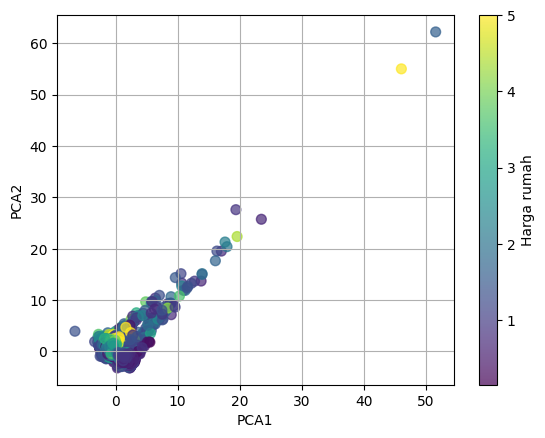

In [62]:
import matplotlib.pyplot as plt

plt.scatter(Xpca[:,0], Xpca[:,1], s=50, alpha=0.7, c=y, cmap='viridis')
plt.colorbar(label='Harga rumah')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid()
plt.show()